In [ ]:
# Import required libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn import tree
import matplotlib.pyplot as plt

# Step 1: Read the Auto data
# a. use pandas to read the data
data = pd.read_csv("auto_data.csv")

# b. output the first few rows
print(data.head())

# c. output the dimensions of the data
print("Data dimensions:", data.shape)

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
Data dimensions: (392, 9)


In [ ]:

# Step 2: Data exploration with code
# a. use describe() on the mpg, weight, and year columns
print(data[['mpg', 'weight', 'year']].describe())

# b. write comments indicating the range and average of each column
# The range of mpg is 9 to 46.6, with an average of 23.5
# The range of weight is 1613 to 5140, with an average of 2970
# The range of year is 70 to 82, with an average of 76


              mpg       weight        year
count  392.000000   392.000000  390.000000
mean    23.445918  2977.584184   76.010256
std      7.805007   849.402560    3.668093
min      9.000000  1613.000000   70.000000
25%     17.000000  2225.250000   73.000000
50%     22.750000  2803.500000   76.000000
75%     29.000000  3614.750000   79.000000
max     46.600000  5140.000000   82.000000


In [ ]:
# Step 3: Explore
# a. check the data types of all columns
print(data.dtypes)

# b. change the cylinders column to categorical (use cat.codes)
data['cylinders'] = data['cylinders'].astype('category').cat.codes

# c. change the origin column to categorical (don’t use cat.codes)
data['origin'] = data['origin'].astype('category')

# d. verify the changes with the dtypes attribute
print(data.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object
mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object


In [ ]:
# Step 4: Deal with NAs
# a. delete rows with NAs
data = data.dropna()

# b. output the new dimensions
print("New dimensions after removing NAs:", data.shape)

New dimensions after removing NAs: (389, 9)


In [ ]:
# Step 5: Modify columns
# a. make a new column, mpg_high, and make it categorical:
# i. the column == 1 if mpg > average mpg, else == 0
data['mpg_high'] = (data['mpg'] > data['mpg'].mean()).astype(int)

# b. delete the mpg and name columns
data = data.drop(['mpg', 'name'], axis=1)

# c. output the first few rows of the modified data frame
print(data.head())

   cylinders  displacement  horsepower  weight  acceleration  year origin  \
0          4         307.0         130    3504          12.0  70.0      1   
1          4         350.0         165    3693          11.5  70.0      1   
2          4         318.0         150    3436          11.0  70.0      1   
3          4         304.0         150    3433          12.0  70.0      1   
6          4         454.0         220    4354           9.0  70.0      1   

   mpg_high  
0         0  
1         0  
2         0  
3         0  
6         0  


<Axes: xlabel='mpg_high', ylabel='weight'>

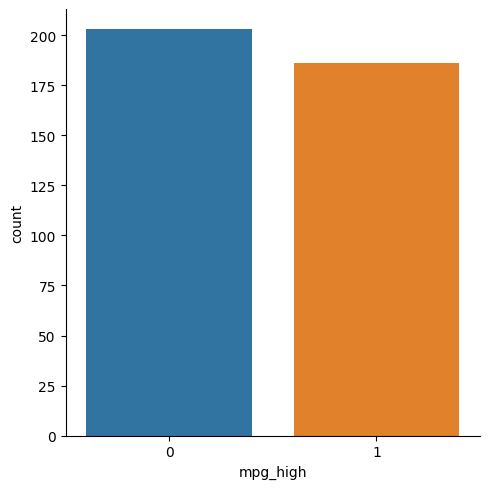

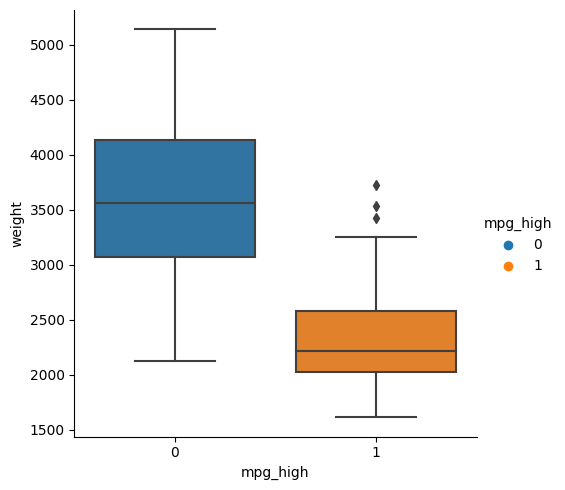

In [ ]:
# Step 6: Data exploration with graphs
# a. seaborn catplot on the mpg_high column
sns.catplot(data=data, x='mpg_high', kind='count')
# From this graph, we can see that there are more cars with low mpg than high mpg.

# b. seaborn relplot with horsepower on the x axis, weight on the y axis, setting hue or style to mpg_high
sns.relplot(data=data, x='horsepower', y='weight', hue='mpg_high')
# From this graph, we can see that cars with lower weight and horsepower tend to have higher mpg.

# c. seaborn boxplot with mpg_high on the x axis and weight on the y axis
sns.boxplot(data=data, x='mpg_high', y='weight')
# From this graph, we can see that cars with high mpg tend to have lower weight.

In [ ]:
# Step 7: Train/test split
# a. 80/20 split
# b. use seed 1234 so we all get the same results
X = data.drop('mpg_high', axis=1)
y = data['mpg_high']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# c. train / test X data frames consist of all remaining columns except mpg_high
# d. output the dimensions of train and test
print("Train dimensions:", X_train.shape, y_train.shape)
print("Test dimensions:", X_test.shape, y_test.shape)

Train dimensions: (311, 7) (311,)
Test dimensions: (78, 7) (78,)


In [ ]:
# Step 8: Logistic
# a. train a logistic regression model using solver lbfgs
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic_model.fit(X_train, y_train)

# b. test and evaluate
y_pred_logistic = logistic_model.predict(X_test)

# c. print metrics using the classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88        50
           1       0.73      0.96      0.83        28

    accuracy                           0.86        78
   macro avg       0.85      0.88      0.85        78
weighted avg       0.89      0.86      0.86        78



Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        50
           1       0.87      0.93      0.90        28

    accuracy                           0.92        78
   macro avg       0.91      0.92      0.92        78
weighted avg       0.93      0.92      0.92        78



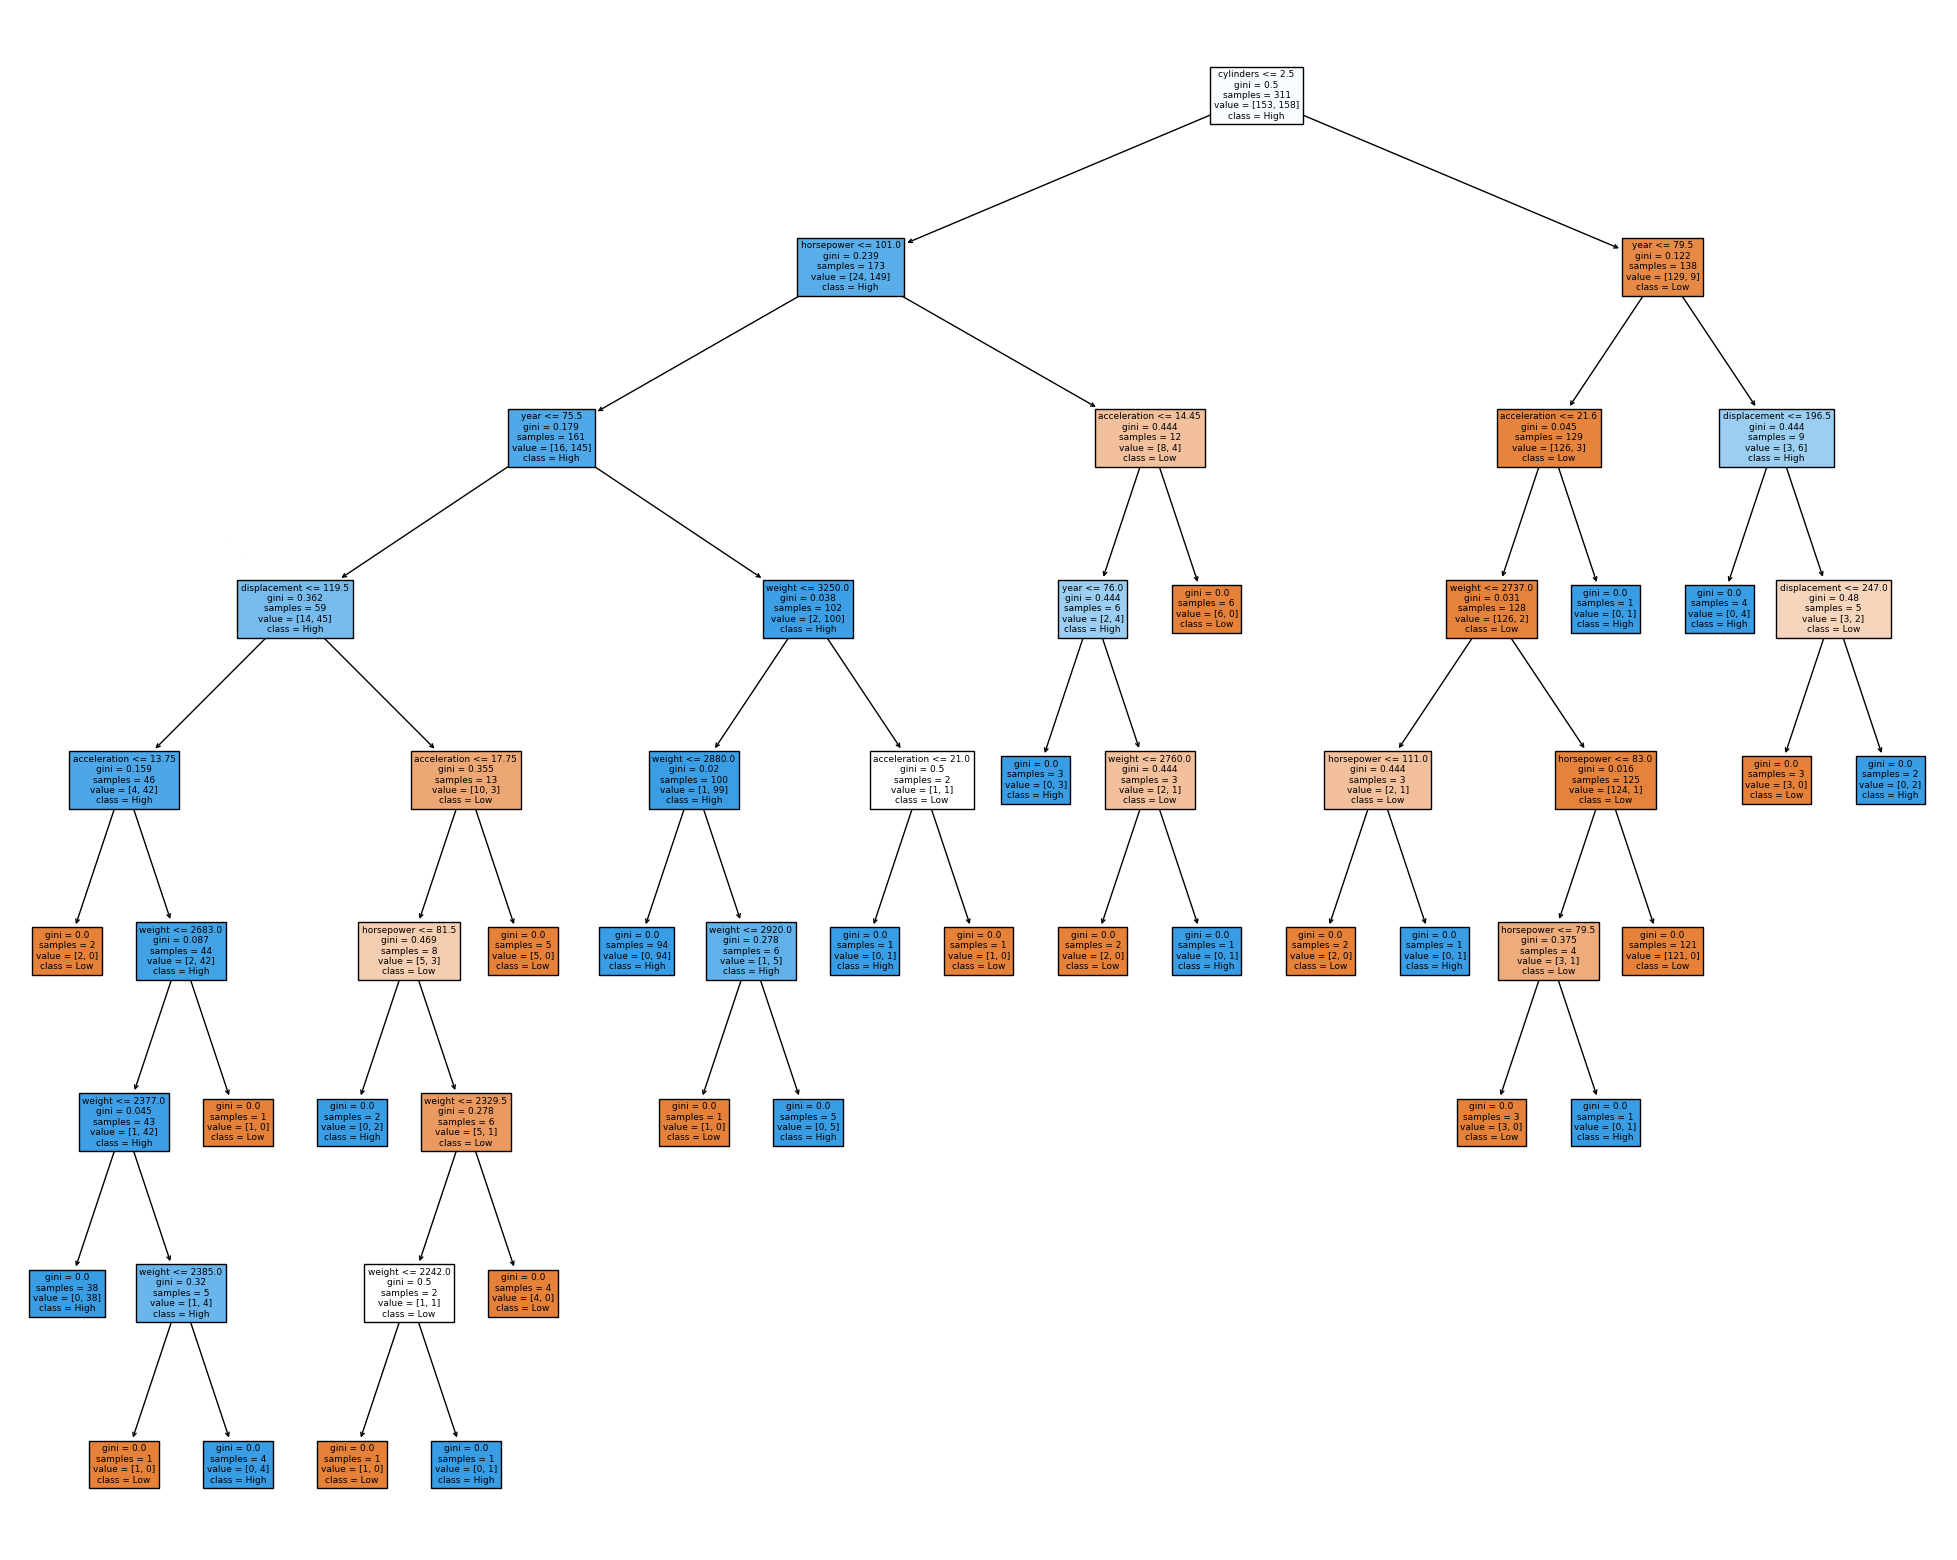

In [ ]:
# Step 9: Decision Tree
# a. train a decision tree
tree_model = DecisionTreeClassifier(random_state=1234)
tree_model.fit(X_train, y_train)

# b. test and evaluate
y_pred_tree = tree_model.predict(X_test)

# c. print the classification report metrics
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

# d. plot the tree (optional)
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(tree_model, feature_names=X.columns, class_names=['Low', 'High'], filled=True)

In [ ]:
# Step 10: Neural Network
# a. train a neural network, choosing a network topology of your choice
nn_model_1 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=1234)
nn_model_1.fit(X_train, y_train)

# b. test and evaluate
y_pred_nn_1 = nn_model_1.predict(X_test)

# c. train a second network with a different topology and different settings
nn_model_2 = MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1000, random_state=1234)
nn_model_2.fit(X_train, y_train)

# d. test and evaluate
y_pred_nn_2 = nn_model_2.predict(X_test)

# e. compare the two models and why you think the performance was same/different
print("Neural Network 1 Classification Report:")
print(classification_report(y_test, y_pred_nn_1))

print("Neural Network 2 Classification Report:")
print(classification_report(y_test, y_pred_nn_2))

Neural Network 1 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.36      1.00      0.53        28

    accuracy                           0.36        78
   macro avg       0.18      0.50      0.26        78
weighted avg       0.13      0.36      0.19        78

Neural Network 2 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.36      1.00      0.53        28

    accuracy                           0.36        78
   macro avg       0.18      0.50      0.26        78
weighted avg       0.13      0.36      0.19        78



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

In [ ]:
# Step 11: Analysis
# a. which algorithm performed better?
# From the classification reports, compare the metrics for each model to see which one performed better.

# b. compare accuracy, recall and precision metrics by class
# This can be done by comparing the classification reports.

# c. give your analysis of why the better-performing algorithm might have outperformed the other
# Analyze the performance of each model and provide reasoning on why one might be

### **Which algorithm performed better?**
The Decision Tree model performed better, with an accuracy of 0.92, compared to the Logistic Regression model with an accuracy of 0.86. Both Neural Network models had much lower accuracy at 0.36.

### **Compare accuracy, recall, and precision metrics by class.**

For class 0 (Low mpg_high):

Decision Tree had the highest precision (0.96) and recall (0.92) scores.
Logistic Regression had lower precision (0.98) and recall (0.80) scores.
Both Neural Network models had 0 precision and recall scores for class 0.
For class 1 (High mpg_high):

Decision Tree had the highest precision (0.87) and recall (0.93) scores.
Logistic Regression had lower precision (0.73) and recall (0.96) scores.
Both Neural Network models had the same precision (0.36) and recall (1.00) scores for class 1.

### **Give your analysis of why the better-performing algorithm might have outperformed the other.**

The Decision Tree model outperformed the other models, possibly because it was able to capture complex relationships between the features more effectively. In contrast, the Logistic Regression model may have been limited by its linear nature. The Neural Network models had poor performance, which could be due to insufficient training, inadequate model architecture, or the need for feature scaling.

### **Comparing experiences using R versus scikit-learn:**

I prefer using R as oppsed to sklean. The syntax is more intuitive and RStudio is better at showing errors with detailed error messages.



